In [99]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
import pydotplus
from sklearn import tree
from IPython.display import Image
import graphviz
from matplotlib import rcParams # 图大小
from termcolor import colored as cl # 文本自定义
from sklearn.metrics import accuracy_score # 模型准确度
from sklearn.tree import plot_tree # 树图
from sklearn.model_selection import train_test_split

In [2]:
from sklearn import datasets

In [11]:
data = pd.read_csv("C1-data.csv")
data.head()

,文物编号,纹饰,类型,颜色,表面风化,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2)
0,1,C,高钾,蓝绿,无风化,69.33,NaN,9.99,6.32,0.87,3.93,1.74,3.870,NaN,NaN,1.17,NaN,NaN,0.39
1,2,A,铅钡,浅蓝,风化,36.28,NaN,1.05,2.34,1.18,5.73,1.86,0.260,47.43,NaN,3.57,0.19,NaN,NaN
2,3,A,高钾,蓝绿,无风化,74.38,NaN,8.78,3.94,1.11,4.78,2.16,2.935,0.83,2.86,0.68,0.10,NaN,NaN
3,4,A,高钾,蓝绿,无风化,65.88,NaN,9.67,7.12,1.56,6.44,2.06,2.180,NaN,NaN,0.79,NaN,NaN,0.36
4,5,A,高钾,蓝绿,无风化,61.58,NaN,10.95,7.35,1.77,7.50,2.62,3.270,NaN,NaN,0.94,0.06,NaN,0.47


数据预处理

In [13]:
data.loc[data['类型']=='高钾','类型']='1'
data.loc[data['类型']=='铅钡','类型']='0'
data

,文物编号,纹饰,类型,颜色,表面风化,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2)
0,1,C,1,蓝绿,无风化,69.330,NaN,9.990,6.320,0.870,3.930,1.740,3.870,NaN,NaN,1.170,NaN,NaN,0.390
1,2,A,0,浅蓝,风化,36.280,NaN,1.050,2.340,1.180,5.730,1.860,0.260,47.430,NaN,3.570,0.190,NaN,NaN
2,3,A,1,蓝绿,无风化,74.380,NaN,8.780,3.940,1.110,4.780,2.160,2.935,0.830,2.860,0.680,0.100,NaN,NaN
3,4,A,1,蓝绿,无风化,65.880,NaN,9.670,7.120,1.560,6.440,2.060,2.180,NaN,NaN,0.790,NaN,NaN,0.360
4,5,A,1,蓝绿,无风化,61.580,NaN,10.950,7.350,1.770,7.500,2.620,3.270,NaN,NaN,0.940,0.060,NaN,0.470
5,6,A,1,蓝绿,无风化,63.730,NaN,7.525,5.410,1.855,10.600,4.215,2.345,0.275,1.175,4.340,0.115,NaN,NaN
6,7,B,1,蓝绿,风化,92.630,NaN,NaN,1.070,NaN,1.980,0.170,3.240,NaN,NaN,0.610,NaN,NaN,NaN
7,8,C,0,紫,风化,12.375,NaN,NaN,2.335,NaN,1.225,NaN,6.775,30.565,30.925,5.575,0.450,NaN,8.805
8,9,B,1,蓝绿,风化,95.020,NaN,0.590,0.620,NaN,1.320,0.320,1.550,NaN,NaN,0.350,NaN,NaN,NaN
9,10,B,1,蓝绿,风化,96.770,NaN,0.920,0.210,NaN,0.810,0.260,0.840,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
data=data.fillna(value=0)
data

,文物编号,纹饰,类型,颜色,表面风化,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2)
0,1,C,1,蓝绿,无风化,69.330,0.00,9.990,6.320,0.870,3.930,1.740,3.870,0.000,0.000,1.170,0.000,0.000,0.390
1,2,A,0,浅蓝,风化,36.280,0.00,1.050,2.340,1.180,5.730,1.860,0.260,47.430,0.000,3.570,0.190,0.000,0.000
2,3,A,1,蓝绿,无风化,74.380,0.00,8.780,3.940,1.110,4.780,2.160,2.935,0.830,2.860,0.680,0.100,0.000,0.000
3,4,A,1,蓝绿,无风化,65.880,0.00,9.670,7.120,1.560,6.440,2.060,2.180,0.000,0.000,0.790,0.000,0.000,0.360
4,5,A,1,蓝绿,无风化,61.580,0.00,10.950,7.350,1.770,7.500,2.620,3.270,0.000,0.000,0.940,0.060,0.000,0.470
5,6,A,1,蓝绿,无风化,63.730,0.00,7.525,5.410,1.855,10.600,4.215,2.345,0.275,1.175,4.340,0.115,0.000,0.000
6,7,B,1,蓝绿,风化,92.630,0.00,0.000,1.070,0.000,1.980,0.170,3.240,0.000,0.000,0.610,0.000,0.000,0.000
7,8,C,0,紫,风化,12.375,0.00,0.000,2.335,0.000,1.225,0.000,6.775,30.565,30.925,5.575,0.450,0.000,8.805
8,9,B,1,蓝绿,风化,95.020,0.00,0.590,0.620,0.000,1.320,0.320,1.550,0.000,0.000,0.350,0.000,0.000,0.000
9,10,B,1,蓝绿,风化,96.770,0.00,0.920,0.210,0.000,0.810,0.260,0.840,0.000,0.000,0.000,0.000,0.000,0.000


In [69]:
dummy_features = ["纹饰", "颜色", "表面风化"]
dummy_X = pd.get_dummies(data[dummy_features])

In [70]:
features = data.iloc[:,5:]

In [71]:
features = pd.DataFrame(features)
dummy_X = pd.DataFrame(dummy_X)
features = pd.merge(features,dummy_X,right_index=True,left_index=True)
features

,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),...,颜色_浅绿,颜色_浅蓝,颜色_深绿,颜色_深蓝,颜色_紫,颜色_绿,颜色_蓝绿,颜色_黑,表面风化_无风化,表面风化_风化
0,69.330,0.00,9.990,6.320,0.870,3.930,1.740,3.870,0.000,0.000,...,0,0,0,0,0,0,1,0,1,0
1,36.280,0.00,1.050,2.340,1.180,5.730,1.860,0.260,47.430,0.000,...,0,1,0,0,0,0,0,0,0,1
2,74.380,0.00,8.780,3.940,1.110,4.780,2.160,2.935,0.830,2.860,...,0,0,0,0,0,0,1,0,1,0
3,65.880,0.00,9.670,7.120,1.560,6.440,2.060,2.180,0.000,0.000,...,0,0,0,0,0,0,1,0,1,0
4,61.580,0.00,10.950,7.350,1.770,7.500,2.620,3.270,0.000,0.000,...,0,0,0,0,0,0,1,0,1,0
5,63.730,0.00,7.525,5.410,1.855,10.600,4.215,2.345,0.275,1.175,...,0,0,0,0,0,0,1,0,1,0
6,92.630,0.00,0.000,1.070,0.000,1.980,0.170,3.240,0.000,0.000,...,0,0,0,0,0,0,1,0,0,1
7,12.375,0.00,0.000,2.335,0.000,1.225,0.000,6.775,30.565,30.925,...,0,0,0,0,1,0,0,0,0,1
8,95.020,0.00,0.590,0.620,0.000,1.320,0.320,1.550,0.000,0.000,...,0,0,0,0,0,0,1,0,0,1
9,96.770,0.00,0.920,0.210,0.000,0.810,0.260,0.840,0.000,0.000,...,0,0,0,0,0,0,1,0,0,1


In [72]:
feature = features

In [58]:
features = features.values
features

array([[69.33,  0.  ,  9.99, ...,  0.  ,  1.  ,  0.  ],
       [36.28,  0.  ,  1.05, ...,  0.  ,  0.  ,  1.  ],
       [74.38,  0.  ,  8.78, ...,  0.  ,  1.  ,  0.  ],
       ...,
       [29.15,  0.  ,  0.  , ...,  0.  ,  0.  ,  1.  ],
       [25.42,  0.  ,  0.  , ...,  0.  ,  0.  ,  1.  ],
       [30.39,  0.  ,  0.34, ...,  0.  ,  0.  ,  1.  ]])

In [59]:
target = data['类型'].values
target

array(['1', '0', '1', '1', '1', '1', '1', '0', '1', '1', '0', '1', '1',
       '1', '1', '1', '1', '1', '0', '0', '1', '1', '0', '0', '0', '0',
       '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0'], dtype=object)

In [102]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 0)

print(cl('X_train shape : {}'.format(X_train.shape), attrs = ['bold']))
print(cl('X_test shape : {}'.format(X_test.shape), attrs = ['bold']))
print(cl('y_train shape : {}'.format(y_train.shape), attrs = ['bold']))
print(cl('y_test shape : {}'.format(y_test.shape), attrs = ['bold']))

X_train shape : (46, 28)
X_test shape : (12, 28)
y_train shape : (46,)
y_test shape : (12,)


In [106]:
decisiontree = DecisionTreeClassifier(random_state=0,criterion = 'entropy', max_depth = 4)

In [110]:
decisiontree.fit(X_train, y_train)
 
pred_model = decisiontree.predict(X_test)
print(cl('Accuracy of the model is {:.0%}'.format(accuracy_score(y_test, pred_model)), attrs = ['bold']))

Accuracy of the model is 100%


In [92]:
rcParams['figure.figsize'] = (25, 20)

In [96]:
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['SimHei']

[Text(697.5, 815.4000000000001, '氧化铅(PbO) <= 5.46\nentropy = 0.911\nsamples = 46\nvalue = [31, 15]\nclass = 高钾'),
 Text(348.75, 271.79999999999995, 'entropy = 0.0\nsamples = 15\nvalue = [0, 15]\nclass = 铅钡'),
 Text(1046.25, 271.79999999999995, 'entropy = 0.0\nsamples = 31\nvalue = [31, 0]\nclass = 高钾')]

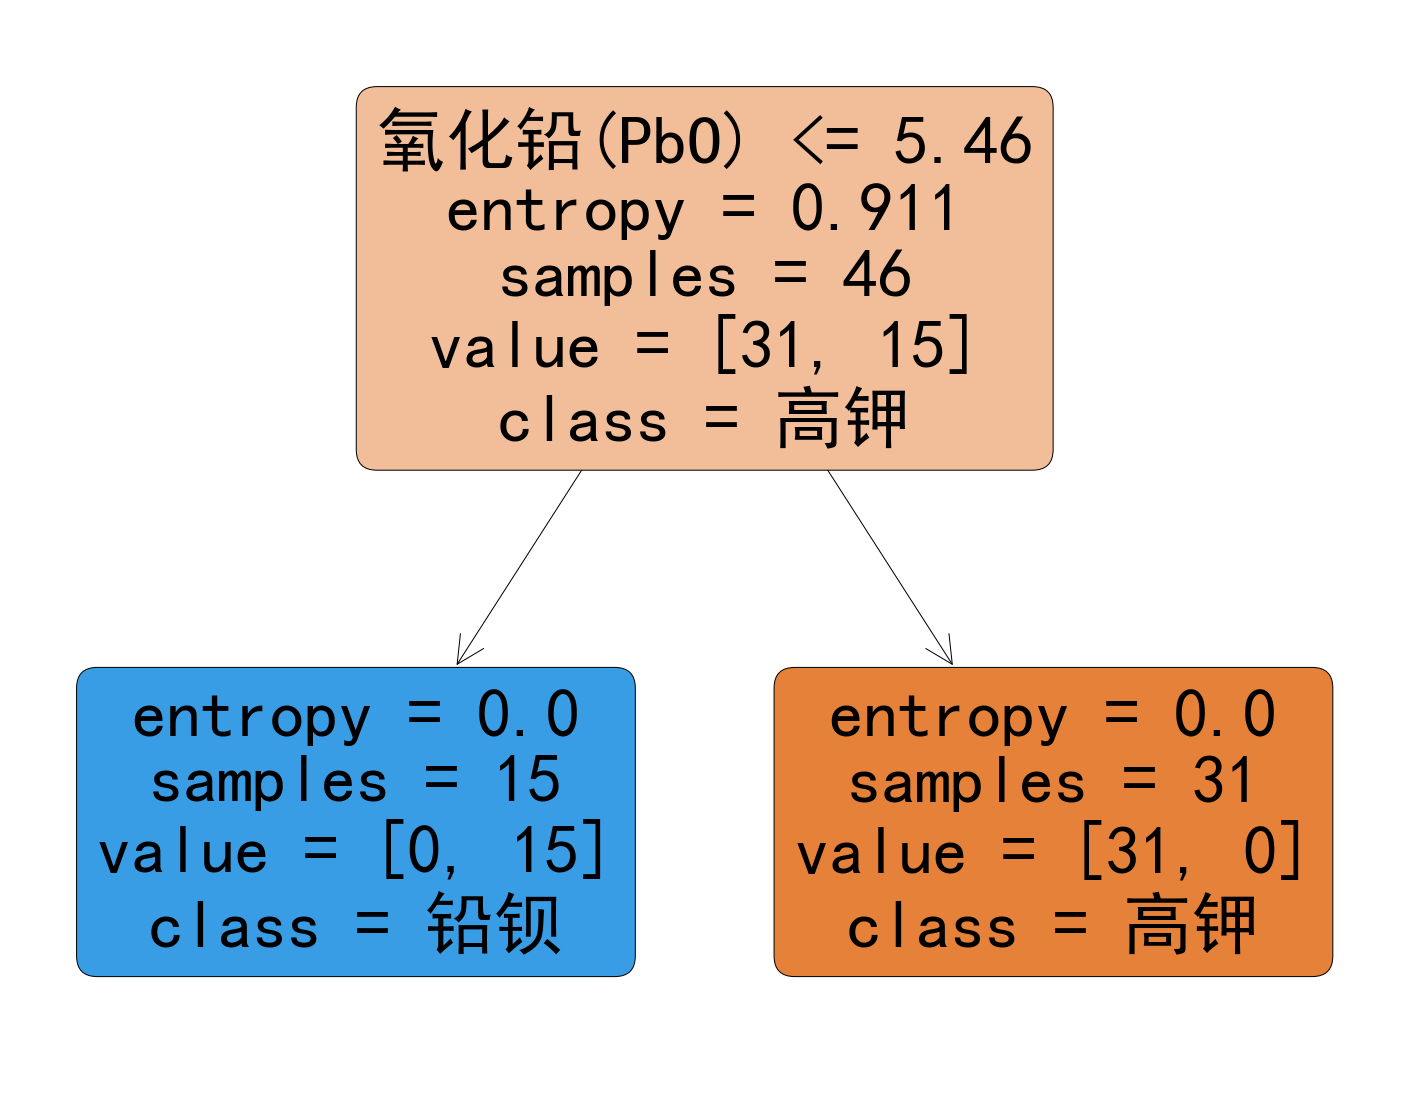

In [111]:
plot_tree(decisiontree, 
          feature_names = feature.columns, 
          class_names = ["高钾",'铅钡'], 
          filled = True, 
          rounded = True)


即只需要用氧化铅即可分辨出高钾和铅钡玻璃

## 2 对于每个类别选择合适的化学成分对其进行亚类划分，给出具体的划分方法及划分结果，并对分类结果的合理性和敏感性进行分析——基于KMeans

In [112]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

高钾玻璃细分类

In [121]:
df_GK = data[data['类型']=="1"]

In [125]:
GK_features = df_GK.iloc[:,5:]
GK_features

,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2)
0,69.33,0.00,9.990,6.32,0.870,3.93,1.740,3.870,0.000,0.000,1.17,0.000,0.00,0.39
2,74.38,0.00,8.780,3.94,1.110,4.78,2.160,2.935,0.830,2.860,0.68,0.100,0.00,0.00
3,65.88,0.00,9.670,7.12,1.560,6.44,2.060,2.180,0.000,0.000,0.79,0.000,0.00,0.36
4,61.58,0.00,10.950,7.35,1.770,7.50,2.620,3.270,0.000,0.000,0.94,0.060,0.00,0.47
5,63.73,0.00,7.525,5.41,1.855,10.60,4.215,2.345,0.275,1.175,4.34,0.115,0.00,0.00
6,92.63,0.00,0.000,1.07,0.000,1.98,0.170,3.240,0.000,0.000,0.61,0.000,0.00,0.00
8,95.02,0.00,0.590,0.62,0.000,1.32,0.320,1.550,0.000,0.000,0.35,0.000,0.00,0.00
9,96.77,0.00,0.920,0.21,0.000,0.81,0.260,0.840,0.000,0.000,0.00,0.000,0.00,0.00
11,94.29,0.00,1.010,0.72,0.000,1.46,0.290,1.650,0.000,0.000,0.15,0.000,0.00,0.00
12,59.01,2.86,12.530,8.70,0.000,6.16,2.880,4.730,0.000,0.000,1.27,0.000,0.00,0.00


In [128]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
standX = scaler.fit_transform(GK_features)
standX
# 肘部法则的可视化
from sklearn.cluster import KMeans
elbow=[]
for i in range(1,6): # 创建遍历，找到最合适的k值
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=101)
    kmeans.fit(GK_features)
    elbow.append(kmeans.inertia_)


d:\Program Files (x86)\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1038: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


d:\Program Files (x86)\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


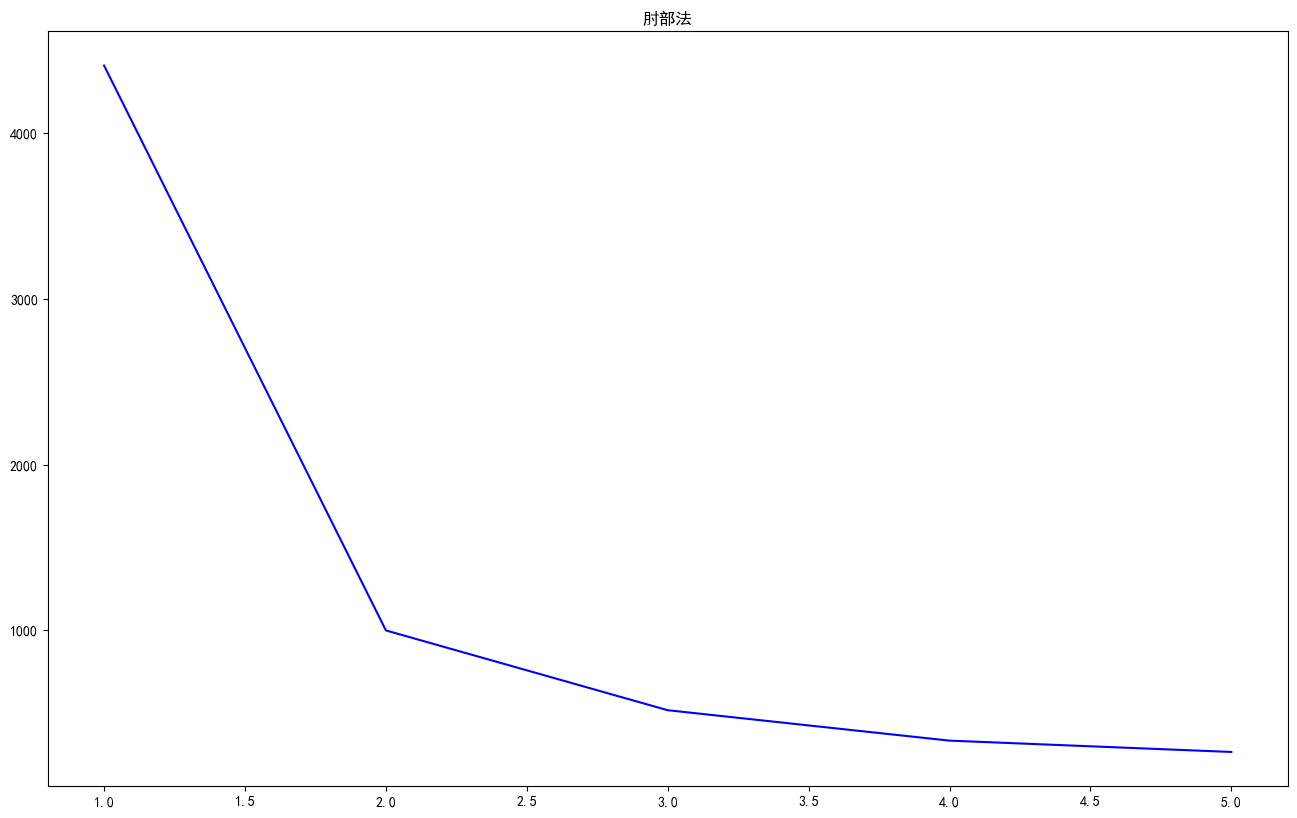

In [133]:
# 通过画图找出最合适的K值
import seaborn as sns
sns.lineplot(range(1,6),elbow,color='blue')
plt.rcParams.update({'figure.figsize':(16,10),'figure.dpi':100})
plt.title('肘部法')
plt.show()

由于肘部出现在2，所以可以确定将高钾玻璃细分为两类

In [135]:
cluster = KMeans(n_clusters=2,random_state=0)

In [136]:
model = cluster.fit(standX)

In [137]:
model.labels_

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0])

In [139]:
df_GK["labels"]=model.labels_
df_GK

C:\Users\程岳\AppData\Local\Temp/ipykernel_24252/2940748870.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_GK["labels"]=model.labels_


,文物编号,纹饰,类型,颜色,表面风化,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2),labels
0,1,C,1,蓝绿,无风化,69.33,0.00,9.990,6.32,0.870,3.93,1.740,3.870,0.000,0.000,1.17,0.000,0.00,0.39,1
2,3,A,1,蓝绿,无风化,74.38,0.00,8.780,3.94,1.110,4.78,2.160,2.935,0.830,2.860,0.68,0.100,0.00,0.00,1
3,4,A,1,蓝绿,无风化,65.88,0.00,9.670,7.12,1.560,6.44,2.060,2.180,0.000,0.000,0.79,0.000,0.00,0.36,1
4,5,A,1,蓝绿,无风化,61.58,0.00,10.950,7.35,1.770,7.50,2.620,3.270,0.000,0.000,0.94,0.060,0.00,0.47,1
5,6,A,1,蓝绿,无风化,63.73,0.00,7.525,5.41,1.855,10.60,4.215,2.345,0.275,1.175,4.34,0.115,0.00,0.00,1
6,7,B,1,蓝绿,风化,92.63,0.00,0.000,1.07,0.000,1.98,0.170,3.240,0.000,0.000,0.61,0.000,0.00,0.00,0
8,9,B,1,蓝绿,风化,95.02,0.00,0.590,0.62,0.000,1.32,0.320,1.550,0.000,0.000,0.35,0.000,0.00,0.00,0
9,10,B,1,蓝绿,风化,96.77,0.00,0.920,0.21,0.000,0.81,0.260,0.840,0.000,0.000,0.00,0.000,0.00,0.00,0
11,12,B,1,蓝绿,风化,94.29,0.00,1.010,0.72,0.000,1.46,0.290,1.650,0.000,0.000,0.15,0.000,0.00,0.00,0
12,13,C,1,浅蓝,无风化,59.01,2.86,12.530,8.70,0.000,6.16,2.880,4.730,0.000,0.000,1.27,0.000,0.00,0.00,1


In [143]:
# 聚类中心
model.cluster_centers_

array([[ 0.66832927, -0.13305616, -0.67338428, -0.93145157, -0.44794514,
        -0.83371951, -0.72028879, -0.54007209, -0.43614899, -0.41850986,
        -0.39982393, -0.36456678,  0.24253563, -0.44375667],
       [-0.66832927,  0.13305616,  0.67338428,  0.93145157,  0.44794514,
         0.83371951,  0.72028879,  0.54007209,  0.43614899,  0.41850986,
         0.39982393,  0.36456678, -0.24253563,  0.44375667]])

敏感性分析

以编号为1的玻璃作为示例进行敏感性分析

In [147]:
GK = df_GK.iloc[:,5:]
GK

,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2),labels
0,69.33,0.00,9.990,6.32,0.870,3.93,1.740,3.870,0.000,0.000,1.17,0.000,0.00,0.39,1
2,74.38,0.00,8.780,3.94,1.110,4.78,2.160,2.935,0.830,2.860,0.68,0.100,0.00,0.00,1
3,65.88,0.00,9.670,7.12,1.560,6.44,2.060,2.180,0.000,0.000,0.79,0.000,0.00,0.36,1
4,61.58,0.00,10.950,7.35,1.770,7.50,2.620,3.270,0.000,0.000,0.94,0.060,0.00,0.47,1
5,63.73,0.00,7.525,5.41,1.855,10.60,4.215,2.345,0.275,1.175,4.34,0.115,0.00,0.00,1
6,92.63,0.00,0.000,1.07,0.000,1.98,0.170,3.240,0.000,0.000,0.61,0.000,0.00,0.00,0
8,95.02,0.00,0.590,0.62,0.000,1.32,0.320,1.550,0.000,0.000,0.35,0.000,0.00,0.00,0
9,96.77,0.00,0.920,0.21,0.000,0.81,0.260,0.840,0.000,0.000,0.00,0.000,0.00,0.00,0
11,94.29,0.00,1.010,0.72,0.000,1.46,0.290,1.650,0.000,0.000,0.15,0.000,0.00,0.00,0
12,59.01,2.86,12.530,8.70,0.000,6.16,2.880,4.730,0.000,0.000,1.27,0.000,0.00,0.00,1


In [151]:
GK.iloc[:1,:-1].values

array([[69.33,  0.  ,  9.99,  6.32,  0.87,  3.93,  1.74,  3.87,  0.  ,
         0.  ,  1.17,  0.  ,  0.  ,  0.39]])

In [154]:
GK.iloc[:1,:-1] = [70,  0.  ,  9.99,  6.32,  0.87,  3.93,  1.74,  3.87,  0.  , 0.  ,  1.17,  0.  ,  0.  ,  0.39]

In [163]:
standGK = scaler.fit_transform(GK.iloc[:,:-1])
standGK[0]

array([-0.41816825, -0.6042783 ,  0.7550843 ,  0.8237477 ,  0.13613578,
       -0.15524964,  0.40900347,  1.47038983, -0.53208914, -0.41850986,
        0.4090021 , -0.57289066, -0.24253563,  2.10966286])

In [164]:
model.predict([standGK[0]])

array([1])

后续的分析只需要改变[70,  0.  ,  9.99,  6.32,  0.87,  3.93,  1.74,  3.87,  0.  , 0.  ,  1.17,  0.  ,  0.  ,  0.39]的取值并分析结果即可

铅钡玻璃细分类

In [120]:
df_QB = data[data['类型']=="0"]

In [126]:
QB_features = df_QB.iloc[:,5:]
QB_features

,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2)
1,36.280,0.00,1.050,2.340,1.180,5.730,1.860,0.260,47.430,0.000,3.570,0.190,0.000,0.000
7,12.375,0.00,0.000,2.335,0.000,1.225,0.000,6.775,30.565,30.925,5.575,0.450,0.000,8.805
10,33.590,0.00,0.210,3.510,0.710,2.690,0.000,4.930,25.390,14.610,9.380,0.370,0.000,0.000
18,29.640,0.00,0.000,2.930,0.590,3.570,1.330,3.510,42.820,5.350,8.830,0.190,0.000,0.000
19,37.360,0.00,0.710,0.000,0.000,5.450,1.510,4.780,9.300,23.550,5.750,0.000,0.000,0.000
22,53.790,7.92,0.000,0.500,0.710,1.420,0.000,2.990,16.980,11.860,0.000,0.330,0.000,0.000
23,31.940,0.00,0.000,0.470,0.000,1.590,0.000,8.460,29.140,26.230,0.140,0.910,0.000,0.000
24,50.610,2.31,0.000,0.630,0.000,1.900,1.550,1.120,31.900,6.650,0.190,0.200,0.000,0.000
25,0.000,0.40,2.225,0.000,0.940,0.000,7.085,29.725,33.850,4.585,0.535,0.000,8.955,8.805
27,68.080,0.00,0.260,1.340,1.000,4.700,0.410,0.330,17.140,4.040,1.040,0.120,0.230,0.000


In [170]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
standQB = scaler.fit_transform(QB_features)
standQB
# 肘部法则的可视化
from sklearn.cluster import KMeans
elbow=[]
for i in range(1,6): # 创建遍历，找到最合适的k值
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=101)
    kmeans.fit(standQB)
    elbow.append(kmeans.inertia_)


d:\Program Files (x86)\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1038: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


d:\Program Files (x86)\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


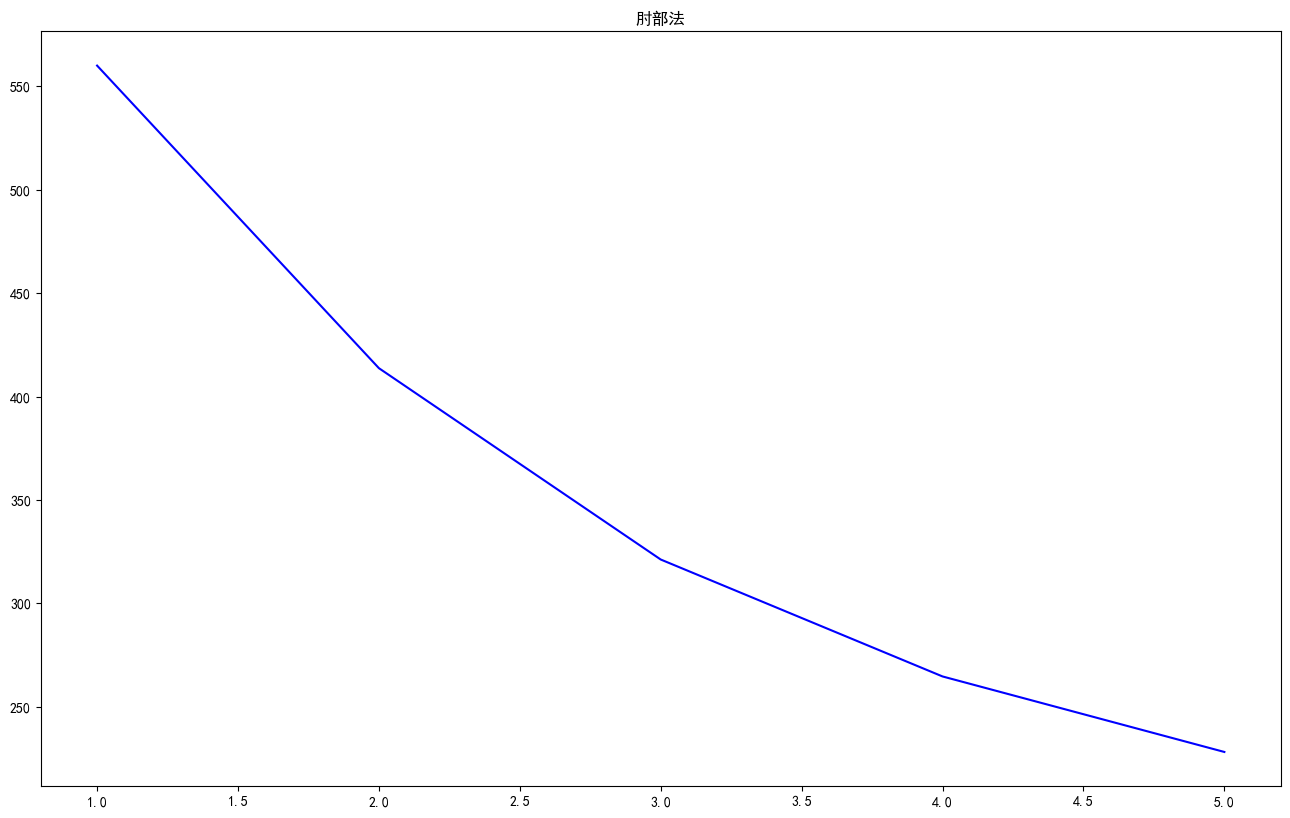

In [171]:
# 通过画图找出最合适的K值
import seaborn as sns
sns.lineplot(range(1,6),elbow,color='blue')
plt.rcParams.update({'figure.figsize':(16,10),'figure.dpi':100})
plt.title('肘部法')
plt.show()

由于肘部出现在2，所以可以确定将高钾玻璃细分为两类

In [167]:
QBcluster = KMeans(n_clusters=2,random_state=0)

In [168]:
QBmodel = cluster.fit(standQB)

In [169]:
QBmodel.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [172]:
df_QB["labels"]=QBmodel.labels_
df_QB

C:\Users\程岳\AppData\Local\Temp/ipykernel_24252/2535950218.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_QB["labels"]=QBmodel.labels_


,文物编号,纹饰,类型,颜色,表面风化,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2),labels
1,2,A,0,浅蓝,风化,36.280,0.00,1.050,2.340,1.180,5.730,1.860,0.260,47.430,0.000,3.570,0.190,0.000,0.000,0
7,8,C,0,紫,风化,12.375,0.00,0.000,2.335,0.000,1.225,0.000,6.775,30.565,30.925,5.575,0.450,0.000,8.805,0
10,11,C,0,浅蓝,风化,33.590,0.00,0.210,3.510,0.710,2.690,0.000,4.930,25.390,14.610,9.380,0.370,0.000,0.000,0
18,19,A,0,无色,风化,29.640,0.00,0.000,2.930,0.590,3.570,1.330,3.510,42.820,5.350,8.830,0.190,0.000,0.000,0
19,20,A,0,浅蓝,无风化,37.360,0.00,0.710,0.000,0.000,5.450,1.510,4.780,9.300,23.550,5.750,0.000,0.000,0.000,0
22,23,A,0,蓝绿,风化,53.790,7.92,0.000,0.500,0.710,1.420,0.000,2.990,16.980,11.860,0.000,0.330,0.000,0.000,0
23,24,C,0,紫,无风化,31.940,0.00,0.000,0.470,0.000,1.590,0.000,8.460,29.140,26.230,0.140,0.910,0.000,0.000,0
24,25,C,0,浅蓝,风化,50.610,2.31,0.000,0.630,0.000,1.900,1.550,1.120,31.900,6.650,0.190,0.200,0.000,0.000,0
25,26,C,0,紫,风化,0.000,0.40,2.225,0.000,0.940,0.000,7.085,29.725,33.850,4.585,0.535,0.000,8.955,8.805,1
27,28,A,0,浅蓝,风化,68.080,0.00,0.260,1.340,1.000,4.700,0.410,0.330,17.140,4.040,1.040,0.120,0.230,0.000,0


In [173]:
# 聚类中心
QBmodel.cluster_centers_

array([[ 5.95277311e-02,  9.02291462e-03, -1.18722541e-01,
         3.13261740e-02, -1.27564055e-02,  2.96671758e-02,
        -1.18299775e-01, -1.47124151e-01, -3.66494619e-03,
         2.06880855e-02,  1.66365806e-02,  3.50512141e-02,
        -1.58076015e-01, -1.07027733e-01],
       [-2.32158151e+00, -3.51893670e-01,  4.63017912e+00,
        -1.22172079e+00,  4.97499815e-01, -1.15701986e+00,
         4.61369122e+00,  5.73784188e+00,  1.42932901e-01,
        -8.06835335e-01, -6.48826644e-01, -1.36699735e+00,
         6.16496458e+00,  4.17408160e+00]])

In [174]:
QB = df_QB.iloc[:,5:]
QB

,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2),labels
1,36.280,0.00,1.050,2.340,1.180,5.730,1.860,0.260,47.430,0.000,3.570,0.190,0.000,0.000,0
7,12.375,0.00,0.000,2.335,0.000,1.225,0.000,6.775,30.565,30.925,5.575,0.450,0.000,8.805,0
10,33.590,0.00,0.210,3.510,0.710,2.690,0.000,4.930,25.390,14.610,9.380,0.370,0.000,0.000,0
18,29.640,0.00,0.000,2.930,0.590,3.570,1.330,3.510,42.820,5.350,8.830,0.190,0.000,0.000,0
19,37.360,0.00,0.710,0.000,0.000,5.450,1.510,4.780,9.300,23.550,5.750,0.000,0.000,0.000,0
22,53.790,7.92,0.000,0.500,0.710,1.420,0.000,2.990,16.980,11.860,0.000,0.330,0.000,0.000,0
23,31.940,0.00,0.000,0.470,0.000,1.590,0.000,8.460,29.140,26.230,0.140,0.910,0.000,0.000,0
24,50.610,2.31,0.000,0.630,0.000,1.900,1.550,1.120,31.900,6.650,0.190,0.200,0.000,0.000,0
25,0.000,0.40,2.225,0.000,0.940,0.000,7.085,29.725,33.850,4.585,0.535,0.000,8.955,8.805,1
27,68.080,0.00,0.260,1.340,1.000,4.700,0.410,0.330,17.140,4.040,1.040,0.120,0.230,0.000,0


In [175]:
QB.iloc[:1,:-1].values

array([[36.28,  0.  ,  1.05,  2.34,  1.18,  5.73,  1.86,  0.26, 47.43,
         0.  ,  3.57,  0.19,  0.  ,  0.  ]])

In [179]:
QB.iloc[:1,:-1] = [60,  0.  ,  1.05,  2.34,  1.18,  5.73,  1.86,  0.26, 47.43,
         0.  ,  3.57,  0.19,  0.  ,  0.  ]

In [180]:
standQB = scaler.fit_transform(QB.iloc[:,:-1])
standQB[0]

array([ 0.9631712 , -0.57585146,  1.8802149 ,  0.38945309,  0.87881704,
        0.63419224,  0.76065252, -0.41925852,  1.0793839 , -1.55896302,
        0.2206204 , -0.50767726, -0.20237914, -0.26828246])

In [181]:
model.predict([standGK[0]])

array([0])

后续的分析只需要改变[60,  0.  ,  1.05,  2.34,  1.18,  5.73,  1.86,  0.26, 47.43,
         0.  ,  3.57,  0.19,  0.  ,  0.  ]的取值并分析结果即可